In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

/Users/briannagreen/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv")

In [3]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [5]:
df['HAIR'].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', nan,
       'Orange Hair', 'Pink Hair', 'Variable Hair', 'Yellow Hair',
       'Light Brown Hair', 'Magenta Hair', 'Bronze Hair', 'Dyed Hair',
       'Orange-brown Hair'], dtype=object)

In [6]:
df['EYE'].unique()

array(['Hazel Eyes', 'Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Grey Eyes',
       'Yellow Eyes', 'Gold Eyes', 'Red Eyes', 'Black Eyeballs',
       'Amber Eyes', 'Variable Eyes', nan, 'Black Eyes', 'White Eyes',
       'Orange Eyes', 'Silver Eyes', 'Purple Eyes', 'Pink Eyes',
       'One Eye', 'Violet Eyes', 'Multiple Eyes', 'Magenta Eyes',
       'Yellow Eyeballs', 'No Eyes', 'Compound Eyes'], dtype=object)

In [7]:
# Add column indicating if the character has blond hair + blue eyes
# For hair colors, I selected the colors that readers of the comics would most likely associate with 'blond'
df['blond_blue'] = (
    df['HAIR'].isin(['Blond Hair', 'Strawberry Blond Hair', 'White Hair', 'Reddish Blond Hair', 'Gold Hair', 'Yellow Hair'])
) & (
    df['EYE'] == 'Blue Eyes'
)

In [8]:
# How many blond + blue characters are there
df.blond_blue.value_counts()

False    15571
True       805
Name: blond_blue, dtype: int64

In [9]:
# How many of the blond + blue characters are Good/Neutral/Bad/missing a value
df[df['blond_blue'] == True].ALIGN.value_counts(dropna=False)

Good Characters       405
Bad Characters        210
Neutral Characters    108
NaN                    82
Name: ALIGN, dtype: int64

In [10]:
# What percent of the blond + blue characters are Good/Neutral/Bad, dropping the NaN values
df[df['blond_blue'] == True].ALIGN.value_counts(normalize=True)

Good Characters       0.560166
Bad Characters        0.290456
Neutral Characters    0.149378
Name: ALIGN, dtype: float64

In [11]:
# How many of the not blond + blue characters are Good/Neutral/Bad/missing a value
df[df['blond_blue'] == False].ALIGN.value_counts(dropna=False)

Bad Characters        6510
Good Characters       4231
NaN                   2730
Neutral Characters    2100
Name: ALIGN, dtype: int64

In [12]:
# What percent of the not blond + blue characters are Good/Neutral/Bad, dropping the NaN values
df[df['blond_blue'] == False].ALIGN.value_counts(normalize=True)

Bad Characters        0.506970
Good Characters       0.329491
Neutral Characters    0.163539
Name: ALIGN, dtype: float64

In [13]:
# Total number of appearances of good blond + blue characters
df[(df["blond_blue"] == True) & (df['ALIGN'] == 'Good Characters')].APPEARANCES.sum()

# Blond + blue characters made an average of 88.5 appearances

35852.0

In [14]:
# Total number of appearances of good not-blond + blue characters
df[(df["blond_blue"] == False) & (df['ALIGN'] == 'Good Characters')].APPEARANCES.sum()

# Not-blond + blue characters made an average of 27.1 appearances

114751.0

In [15]:
# How many characters were introduced each year?
df_year = df.groupby('Year').name.count().reset_index(name='count')
# df_year['Year'] = df_year['Year'].astype(int)
df_year.head()

,Year,count
0,1939.0,69
1,1940.0,221
2,1941.0,207
3,1942.0,244
4,1943.0,198


In [16]:
# How many blond + blue characters were introduced each year?
df_year_bb = df[df['blond_blue'] == True].groupby(by='Year').name.count().reset_index(name='blond_blue_count')

In [17]:
df_year = df_year.merge(df_year_bb, left_on='Year', right_on='Year')
df_year

,Year,count,blond_blue_count
0,1939.0,69,2
1,1940.0,221,11
2,1941.0,207,5
3,1942.0,244,1
4,1943.0,198,3
5,1944.0,134,1
6,1945.0,97,3
7,1946.0,90,2
8,1947.0,72,3
9,1948.0,116,9


In [18]:
# How many not blond + blue characters were introduced each year?
df_year_notbb = df[df['blond_blue'] == False].groupby(by='Year').name.count().reset_index(name='not_blond_blue_count')

In [19]:
df_year = df_year.merge(df_year_notbb, left_on='Year', right_on='Year')
df_year

,Year,count,blond_blue_count,not_blond_blue_count
0,1939.0,69,2,67
1,1940.0,221,11,210
2,1941.0,207,5,202
3,1942.0,244,1,243
4,1943.0,198,3,195
5,1944.0,134,1,133
6,1945.0,97,3,94
7,1946.0,90,2,88
8,1947.0,72,3,69
9,1948.0,116,9,107


In [20]:
# How many 'Good' blond + blue characters were introduced each year?
df_year_bl_bl_good = df[(df['ALIGN'] == "Good Characters") & (df['blond_blue'] == True)].groupby(by='Year').name.count().reset_index(name='blond_blue_good_count')

In [21]:
df_year = df_year.merge(df_year_bl_bl_good, left_on='Year', right_on='Year')
df_year

,Year,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count
0,1939.0,69,2,67,2
1,1940.0,221,11,210,9
2,1941.0,207,5,202,3
3,1943.0,198,3,195,2
4,1944.0,134,1,133,1
5,1945.0,97,3,94,2
6,1946.0,90,2,88,1
7,1947.0,72,3,69,1
8,1948.0,116,9,107,6
9,1950.0,29,2,27,2


In [22]:
# How many 'Good' not-blond + blue characters were introduced each year?
df_year_not_bl_bl_good = df[(df['ALIGN'] == "Good Characters") & (df['blond_blue'] == False)].groupby(by='Year').name.count().reset_index(name='not_blond_blue_good_count')

In [23]:
df_year = df_year.merge(df_year_not_bl_bl_good, left_on='Year', right_on='Year')
df_year

,Year,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count,not_blond_blue_good_count
0,1939.0,69,2,67,2,19
1,1940.0,221,11,210,9,109
2,1941.0,207,5,202,3,59
3,1943.0,198,3,195,2,40
4,1944.0,134,1,133,1,15
5,1945.0,97,3,94,2,2
6,1946.0,90,2,88,1,6
7,1947.0,72,3,69,1,3
8,1948.0,116,9,107,6,30
9,1950.0,29,2,27,2,10


In [25]:
# What percent of blond + blue and not-blond + blue characters were 'Good' each year?
df_year['pct_bl_bl_good'] = df_year['blond_blue_good_count'] / df_year['blond_blue_count']
df_year['pct_not_bl_bl_good'] = df_year['not_blond_blue_good_count'] / df_year['not_blond_blue_count']
df_year

,Year,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count,not_blond_blue_good_count,pct_bl_bl_good,pct_not_bl_bl_good
0,1939.0,69,2,67,2,19,1.000000,0.283582
1,1940.0,221,11,210,9,109,0.818182,0.519048
2,1941.0,207,5,202,3,59,0.600000,0.292079
3,1943.0,198,3,195,2,40,0.666667,0.205128
4,1944.0,134,1,133,1,15,1.000000,0.112782
5,1945.0,97,3,94,2,2,0.666667,0.021277
6,1946.0,90,2,88,1,6,0.500000,0.068182
7,1947.0,72,3,69,1,3,0.333333,0.043478
8,1948.0,116,9,107,6,30,0.666667,0.280374
9,1950.0,29,2,27,2,10,1.000000,0.370370


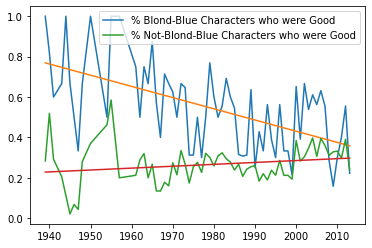

In [33]:
# Plot it, with trend lines
plt.plot(df_year['Year'], df_year['pct_bl_bl_good'], label='% Blond-Blue Characters who were Good')
m, b = np.polyfit(df_year['Year'], df_year['pct_bl_bl_good'], 1)
plt.plot(df_year['Year'], m*df_year['Year'] + b)

plt.plot(df_year['Year'], df_year['pct_not_bl_bl_good'], label='% Not-Blond-Blue Characters who were Good')
m, b = np.polyfit(df_year['Year'], df_year['pct_not_bl_bl_good'], 1)
plt.plot(df_year['Year'], m*df_year['Year'] + b)

plt.legend()

plt.show()